<a href="https://colab.research.google.com/github/CesarAlejandroSoto/Arquitectura-de-Computadores/blob/main/Proyecto_2_Aritmetica_Booleana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1> <font color = '#FE0E0E'> Integrantes </font> </h1>**



*   CESAR ALEJANDRO SOTO PAIPA
*   JEISON FERNANDO GUARGUATI ANAYA
*   MARCOS JOSE ORJUELA MURILLO



**<h1> <font color = '#FE0E0E'> Objetivos </font> </h1>**


Construir los siguientes chips usando el lenguaje ya escogido en P1:

* HalfAdder

* FullAdder

* Add16

* Inc16

* ALU



<h3>Seguimos tomando como referencia la documentacion de Nand2tetris asi mismo seguimos trabajando con Python</h3>

# **Diagramas de las compuertas**

## **<font color = 'Green'> HalfAdder </font>**

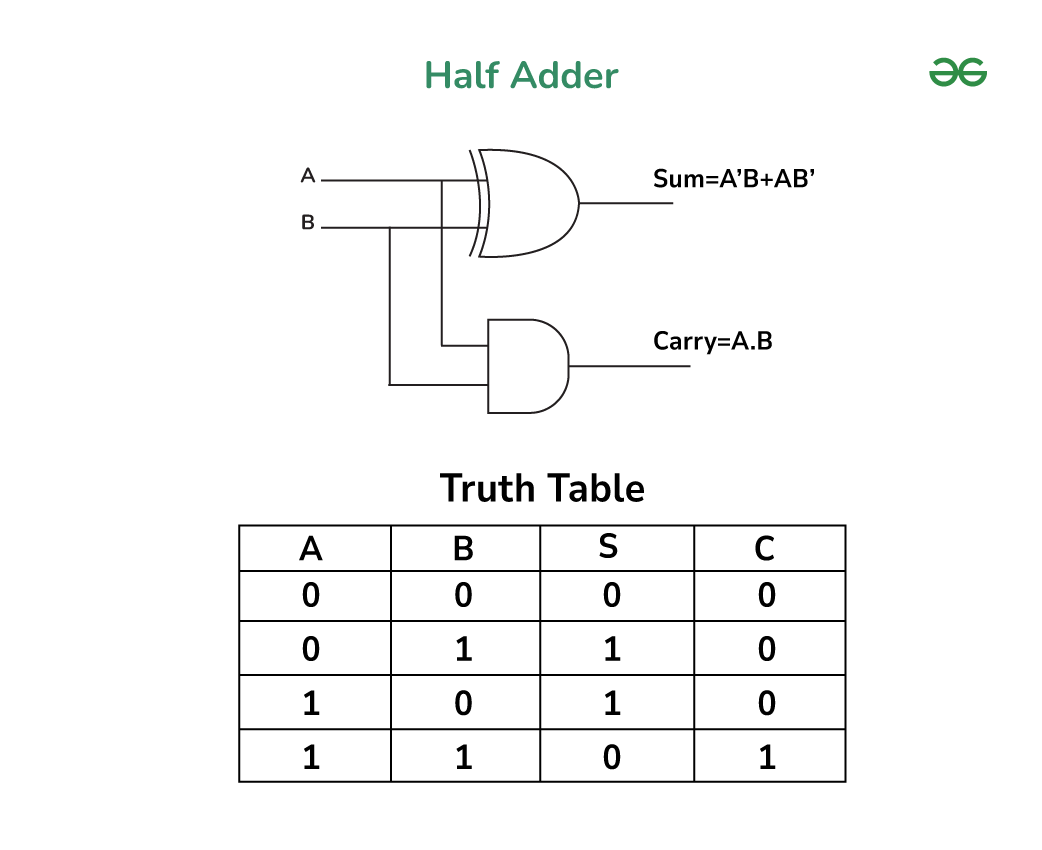

## **<font color = 'yellow'> FullAdder </font>**

<h1> <strong> Diagrama </strong> </h1>

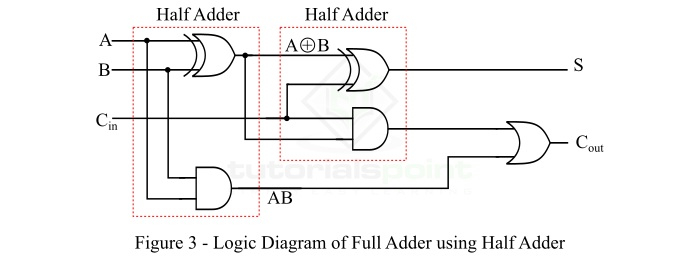

<h1> <strong> Tabla de verdad </strong> </h1>

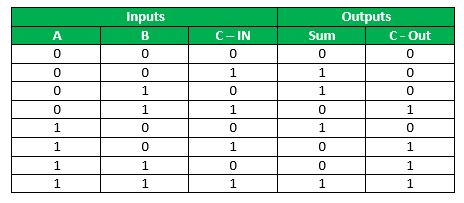

## **<font color = 'sky blue'>Add16**

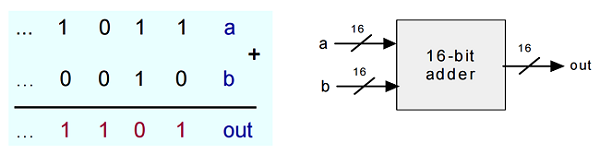

## **<font color = '#FF0000'>Inc16**

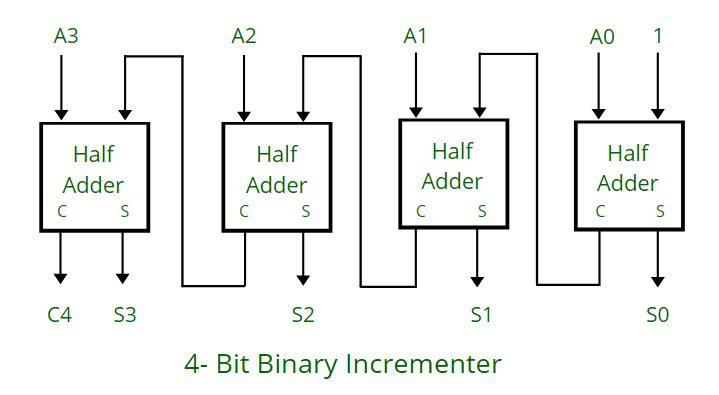

## **<font color = 'lime'>Alu**

<h1> <strong> Diagrama </strong> </h1>



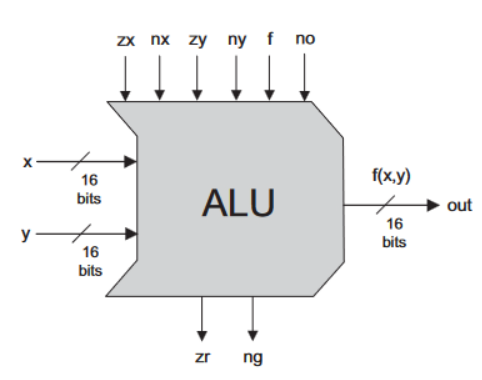

<h1> <strong> Tabla de verdad </strong> </h1>

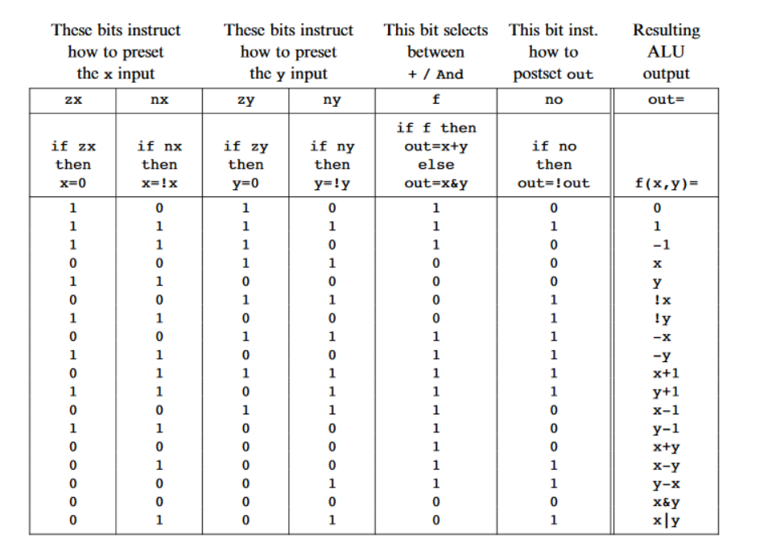

# **Implementacion**

In [ ]:
# Proyecto 2: Aritmética Booleana (seguimos basados en la NAND)
from itertools import product

# Compuerta NAND: Base de todas las demás operaciones
def NAND(a, b):
    return 1 if not (a and b) else 0

# Compuertas básicas
def NOT(a):
    return NAND(a, a)

def AND(a, b):
    return NOT(NAND(a, b))

def OR(a, b):
    return NAND(NOT(a), NOT(b))

def XOR(a, b):
    return AND(NAND(a, b), OR(a, b))

# Half Adder: Suma dos bits y devuelve (suma, acarreo)
def HalfAdder(a, b):
    suma = XOR(a, b)
    acarreo = AND(a, b)
    return suma, acarreo

# Sumador Completo: Suma tres bits y devuelve (suma, acarreo)
def FullAdder(a, b, acarreo_entrada):
    suma1, acarreo1 = HalfAdder(a, b)
    suma_final, acarreo2 = HalfAdder(suma1, acarreo_entrada)
    acarreo_salida = OR(acarreo1, acarreo2)
    return suma_final, acarreo_salida
"""
# Add16: Suma dos números de 16 bits
def Add16(a, b):
    resultado_suma = [0] * 16
    acarreo = 0
    for i in range(16):
        resultado_suma[i], acarreo = FullAdder(a[i], b[i], acarreo)
    return resultado_suma
Presentabamos un error que hacia que la segunda salida de la Alu que deberia ser 1 no me diera
"""
# Add16: Suma dos números de 16 bits
def Add16(a, b):
    resultado_suma = [0] * 16
    acarreo = 0
    for i in range(15
                   , -1, -1):  # Se debe recorrer desde el bit menos significativo (15) al más significativo (0)
        resultado_suma[i], acarreo = FullAdder(a[i], b[i], acarreo)
    return resultado_suma

# Inc16: Incrementa un número de 16 bits en 1
def Inc16(a):
    uno = [1] + [0] * 15  # Representa el número 1 en 16 bits
    return Add16(a, uno)

# Alu
def ALU(x, y, zx, nx, zy, ny, f, no):
    # Aplicar zx y nx a x
    x = [0] * 16 if zx else x[:]  # Si zx = 1, reemplaza x por 16 ceros (borra su contenido)
    x = [NOT(bit) for bit in x] if nx else x  # Si nx = 1, aplica NOT bit a bit a x

    # Aplicar zy y ny a y
    y = [0] * 16 if zy else y[:]  # Si zy = 1, reemplaza y por 16 ceros (borra su contenido)
    y = [NOT(bit) for bit in y] if ny else y  # Si ny = 1, aplica NOT bit a bit a y

    # Operación principal: AND o ADD
    out = Add16(x, y) if f else [AND(x[i], y[i]) for i in range(16)]  # Si f=1, suma x + y; si f=0, aplica AND bit a bit

    # Aplicar negación final si es necesario
    out = [NOT(bit) for bit in out] if no else out  # Si no=1, aplica NOT bit a bit al resultado final

    # Cálculo de los flags zr y ng
    zr = 1 if all(bit == 0 for bit in out) else 0  # El flag zr será 1 si el resultado es cero
    ng = out[0]  # El flag ng es el bit más significativo (signo en complemento a dos)

    return out, zr, ng

# **Pruebas**

In [ ]:
###############################################################################

# Pruebas para el Half Adder
pruebas = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

# Imprimir resultados
print("---------------------------------------------")

print("HalfAdder")
print("\n")
print("| a | b | sum | acarreo |")
print("|---|---|-----|-------|")
for a, b in pruebas:
    suma, acarreo = HalfAdder(a, b)
    print(f"| {a} | {b} |  {suma}  |   {acarreo}   |")

print("---------------------------------------------")
print("\n")

###############################################################################

# Pruebas para el Full Adder
pruebas_full_adder = [
    (0, 0, 0),
    (0, 0, 1),
    (0, 1, 0),
    (0, 1, 1),
    (1, 0, 0),
    (1, 0, 1),
    (1, 1, 0),
    (1, 1, 1)
]

# Imprimir resultados
print("---------------------------------------------")

print("FullAdder")
print("\n")
print("| a | b | acarreo_entrada | sum | acarreo_salida |")
print("|---|---|-----------------|-----|----------------|")
for a, b, acarreo_entrada in pruebas_full_adder:
    suma_final, acarreo_final = FullAdder(a, b, acarreo_entrada)
    print(f"| {a} | {b} |        {acarreo_entrada}        |  {suma_final}  |        {acarreo_final}        |")

print("---------------------------------------------")
print("\n")

###############################################################################

# Pruebas de la Add16

pruebas_add16 = [
    ([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]),
]

# Imprimir resultados
print("---------------------------------------------")

print("Add16")
print("\n")
print("| a                 | b                 | sum               |")
print("|-------------------|-------------------|-------------------|")
for a, b in pruebas_add16:
    sum_result = Add16(a, b)
    print(f"| {''.join(map(str, a))} | {''.join(map(str, b))} | {''.join(map(str, sum_result))} |")

print("---------------------------------------------")
print("\n")

###############################################################################

# Pruebas para el Inc16
pruebas_inc16 = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
]

# Imprimir resultados
print("---------------------------------------------")

print("Inc16")
print("\n")
print("| a                 | sum               |")
print("|-------------------|-------------------|")
for a in pruebas_inc16:
    sum_result = Inc16(a)
    print(f"| {''.join(map(str, a))} | {''.join(map(str, sum_result))} |")

print("---------------------------------------------")
print("\n")

###############################################################################

# Definir entradas
x = [0] * 16  # 0000000000000000
y = [1] * 16  # 1111111111111111
zx, nx, zy, ny, f, no = 1, 1, 1, 0, 1, 0  # Flags de control

# Ejecutar la ALU con los valores de prueba
out, zr, ng = ALU(x, y, zx, nx, zy, ny, f, no)

# Mostrar resultados
print("Salida ALU:", "".join(map(str, out)))  # Mostrar como cadena de bits
print("(zr):", zr)
print("(ng):", ng)

# Ejemplo de entrada para x e y
x = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

combinaciones = [
    (1, 0, 1, 0, 1, 0),
    (1, 1, 1, 1, 1, 1),
    (1, 1, 1, 0, 1, 0),
    (0, 0, 1, 1, 0, 0),
    (1, 1, 0, 0, 0, 0),
    (0, 0, 1, 1, 0, 1),
    (1, 1, 0, 0, 0, 1),
    (0, 0, 1, 1, 1, 1),
    (1, 1, 0, 0, 1, 1),
    (0, 1, 1, 1, 1, 1),
    (1, 1, 0, 1, 1, 1),
    (0, 0, 1, 1, 1, 0),
    (1, 1, 0, 0, 1, 0),
    (0, 0, 0, 0, 1, 0),
    (0, 1, 0, 0, 1, 1),
    (0, 0, 0, 1, 1, 1),
    (0, 0, 0, 0, 0, 0),
    (0, 1, 0, 1, 0, 1)
]

for zx, nx, zy, ny, f, no in combinaciones:
    out, zr, ng = ALU(x, y, zx, nx, zy, ny, f, no)
    print(f"zx={zx}, nx={nx}, zy={zy}, ny={ny}, f={f}, no={no} => out={out}, zr={zr}, ng={ng}")



###############################################################################

---------------------------------------------
HalfAdder


| a | b | sum | acarreo |
|---|---|-----|-------|
| 0 | 0 |  0  |   0   |
| 0 | 1 |  1  |   0   |
| 1 | 0 |  1  |   0   |
| 1 | 1 |  0  |   1   |
---------------------------------------------


---------------------------------------------
FullAdder


| a | b | acarreo_entrada | sum | acarreo_salida |
|---|---|-----------------|-----|----------------|
| 0 | 0 |        0        |  0  |        0        |
| 0 | 0 |        1        |  1  |        0        |
| 0 | 1 |        0        |  1  |        0        |
| 0 | 1 |        1        |  0  |        1        |
| 1 | 0 |        0        |  1  |        0        |
| 1 | 0 |        1        |  0  |        1        |
| 1 | 1 |        0        |  0  |        1        |
| 1 | 1 |        1        |  1  |        1        |
---------------------------------------------


---------------------------------------------
Add16


| a                 | b                 | sum               |
|-------